# 8. STATSMODEL Fundamentals

- Introduction to Statsmodels
- ETS Decomposition
- Moving Averages
- Holt winters Methods
- Forecasting with Holt-Winters Methods
- Stationarity and Differencing

### Introduction to Statsmodels

--- Hodrick-Prescott filter ---

In [1]:
"""
- Trends: Upward, downward or horizontal tendencies of data
- Seasonal components: Trends that repeat often
- Cyclical components: Trends  with not set repetition
- Hodrick-Prescott filter: Separates time-series seasonal y_t into a trend component
and T_t and a cyclical component C_t
    yt = Tt + Ct
- lambda: smoothing parameter
- Recommendations: Use 1600 lambda default value
Also, use 6.25 for annual data, and 129,600 for monthly data
"""
import numpy as np
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter

In [2]:
pwd

'C:\\Users\\anton\\Google Drive\\Master in Data Science\\Ryerson\\CIND-830'

In [3]:
df = pd.read_csv('C:/Users/anton/Google Drive/Master in Data Science/Courses/8. Time Series with Python/UDEMY_TSA_FINAL/Data/macrodata.csv',index_col=0,parse_dates=True)

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
"""
hpfilter function takes the feature in the dataframe and lambda parameter value
We keep lambda in 1600 since data is quarterly
hpfilter returns trend component and cyclical component.
since the hpfilter returns a tuple with the two components, we could assign each to a variable
In this case, gdp_cycle and gdp_trend
"""
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [6]:
df['trend'] = gdp_trend

<AxesSubplot:>

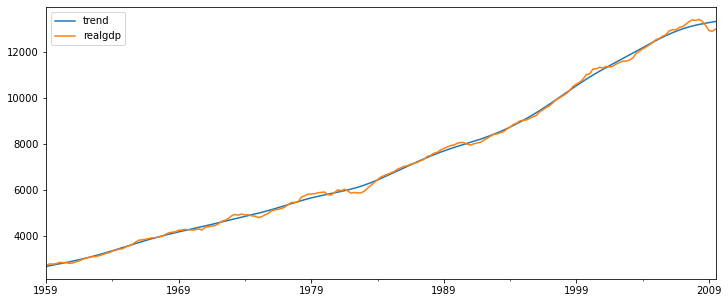

In [7]:
df[['trend','realgdp']].plot(figsize=(12,5))

<AxesSubplot:>

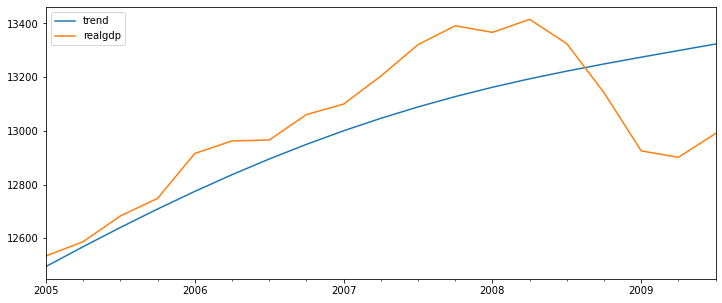

In [8]:
df[['trend','realgdp']]['2005':].plot(figsize=(12,5)) #filter by year

### ETS Decomposition

In [9]:
"""
ETS: Error Trend Seasonality
- Exponential Smoothing
- Trend Method Models. Could be linear or exponential
- ETS Decomposition
    - ETS Additive Model: increasing/decreasing seasonality in a linear rate.
    - ETS Multiplicative: increasing/decreasing seasonality at non-linear rate.

Seasonal decomposition tool:
"""
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [10]:
airline = pd.read_csv('C:/Users/anton/Google Drive/Master in Data Science/Courses/8. Time Series with Python/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col=0,parse_dates=True)
airline = airline.dropna()

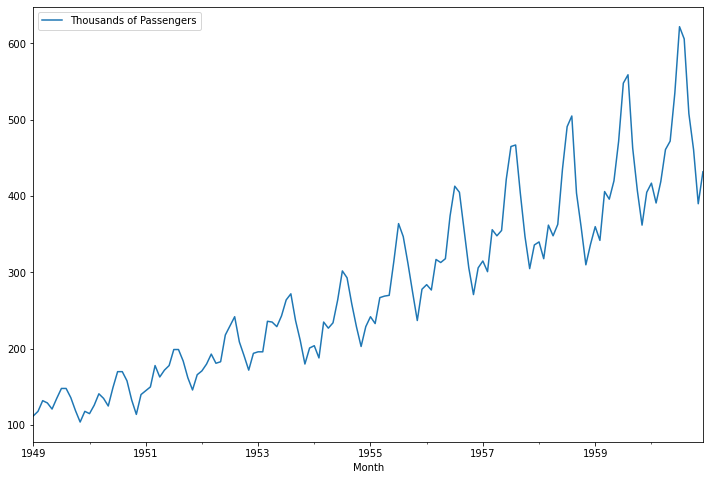

In [11]:
airline.plot();

In [12]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

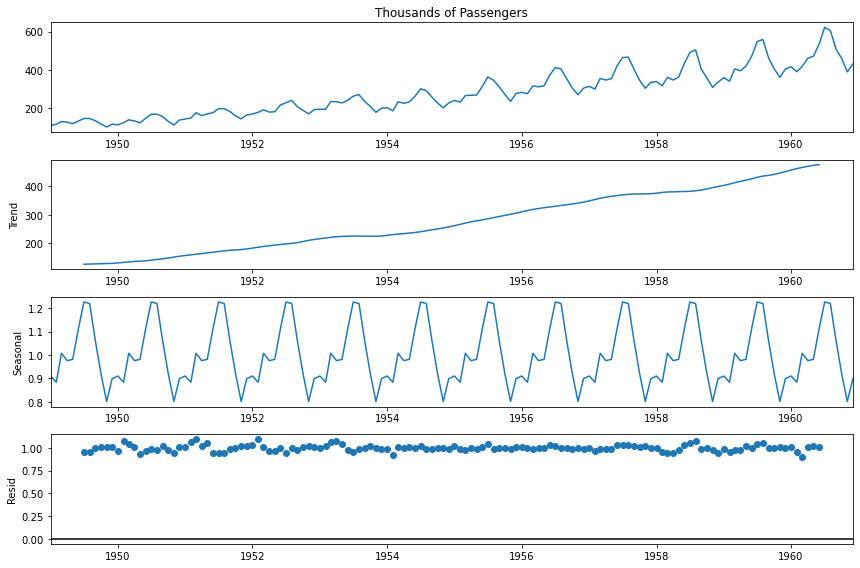

In [13]:
result.plot();

### Moving Averages

In [14]:
"""
SMA: Simple Moving Average
    - Longer window size, general trend. You will never reach to full peak or valley of the data due to averaging.
    - shorter window size will include seasonality / more noise
    - Does not inform about future behavior
    - Extreme historical values can skew your data
EWMA: Exponentially Weighted Moving Averages
    - more recent data weighted more than older data. This is where the name came from
    - we do this by implementing EWMA instead SMA
    - the amoount of weight applied to the most recent values will depend on the actual parameters used in the EWMA
    and the number of periods given a window size.
    - function: Apply .ewm to data. Then, adjust some parameters:
        - span: Last x months, days or years. This value apply more weight to the last X timespan.
        - center of mass: has a more physical interpretation and can be thought of in terms of span: c=(s-1)/2
        - Half-life is the period of time for the exponential weight to reduce to one half.
        - alpha specifies the smoothing factor directly.
"""



'\nSMA: Simple Moving Average\n    - Longer window size, general trend. You will never reach to full peak or valley of the data due to averaging.\n    - shorter window size will include seasonality / more noise\n    - Does not inform about future behavior\n    - Extreme historical values can skew your data\nEWMA: Exponentially Weighted Moving Averages\n    - more recent data weighted more than older data. This is where the name came from\n    - we do this by implementing EWMA instead SMA\n    - the amoount of weight applied to the most recent values will depend on the actual parameters used in the EWMA\n    and the number of periods given a window size.\n    - function: Apply .ewm to data. Then, adjust some parameters:\n        - span: Last x months, days or years. This value apply more weight to the last X timespan.\n        - center of mass: has a more physical interpretation and can be thought of in terms of span: c=(s-1)/2\n        - Half-life is the period of time for the exponent

In [15]:
airline.index = pd.to_datetime(airline.index)

In [16]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

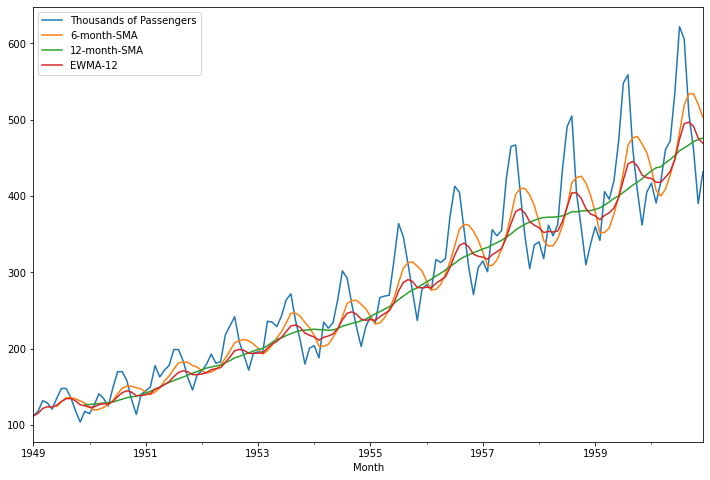

In [17]:
airline.plot();

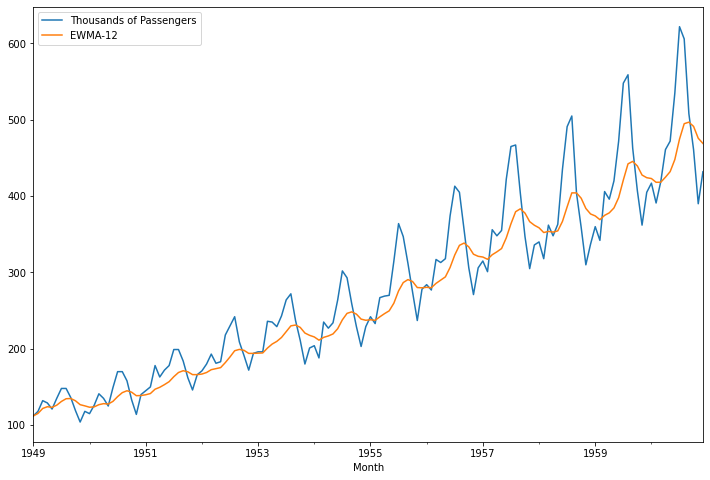

In [18]:
airline[['Thousands of Passengers','EWMA-12']].plot();

### Holt-Winters Method

In [19]:
"""
alpha parameter in EWMA is a smoothing factor. However, it fails to account for other contributing factors like
trend and seasonality.
Holt-Winter accounts for three additional smoothing methods
    -l_t level
    -b_t trend
    -s_t seasonal
    - they correspond to alpha, beta and gamma smoothing parameters
    
    Variations of the method:
        - Additive - Preferred when seasonal variation remains constant
        - Multiplicative
        
    Single Exponential Smoothing
        - Just like we did we EWMA, same thing. Here, we only using alpha component.
    Double Exponential Smoothing aka Holts Method
        - We introduce a new smoothing factor called beta that address trend component.
        - In here, the forecasting model is simply a straight sloped line extending from the most
        recent data point.
    Triple Exponential Smoothing aka Holts-Winter
        - We introduce a third smoothing factor, gamma for seasonality
        - Parameter L: represents the number of divisions per cycle. So, we haveIf monthly data that displays
        repeating pattern each year, we would use L=12
"""
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #for single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #for double exponential smoothing

In [20]:
airline.drop(columns=['6-month-SMA','12-month-SMA','EWMA-12'],axis=1,inplace=True)

In [21]:
airline.index #observe freq in datetime data type is set to None

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [22]:
"""
Check Offset aliases in class notebook
"""
airline.index.freq='MS'

In [23]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
"""
See notebook if need explanation of values
"""
span=12
alpha=2/(span+1)
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [25]:
airline

,Thousands of Passengers,EWMA-12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


--- Single Exponential Smoothing---

In [26]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [27]:
"""
parameter of .fit method
smoothing_level is the same alpha value we use in .ewm method
optimized is basically: should the values that have not been set above be optimized automatically?
in this class, when we put False in optimized it would cause shift for the very first value of the series. See 112 and 112
in first two rows. howver, you could use the .shift method to fix this
"""
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [28]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [29]:
airline['SES-12'] = fitted_model.fittedvalues.shift(-1)
airline

,Thousands of Passengers,EWMA-12,SES-12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


--- Double Exponential Smoothing---

In [30]:
"""
Add parameter: For Additive trend
Mul parameter: For Multiplicative trend
"""
airline['DS_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)
airline['DS_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [31]:
airline.head()

,Thousands of Passengers,EWMA-12,SES-12,DS_add_12,DS_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.221156,112.688538
1949-02-01,118,112.923077,112.923077,120.175837,118.725424
1949-03-01,132,115.857988,115.857988,134.115056,132.811491
1949-04-01,129,117.879836,117.879836,131.244976,129.793048
1949-05-01,121,118.359861,118.359861,123.283465,121.743867


<AxesSubplot:xlabel='Month'>

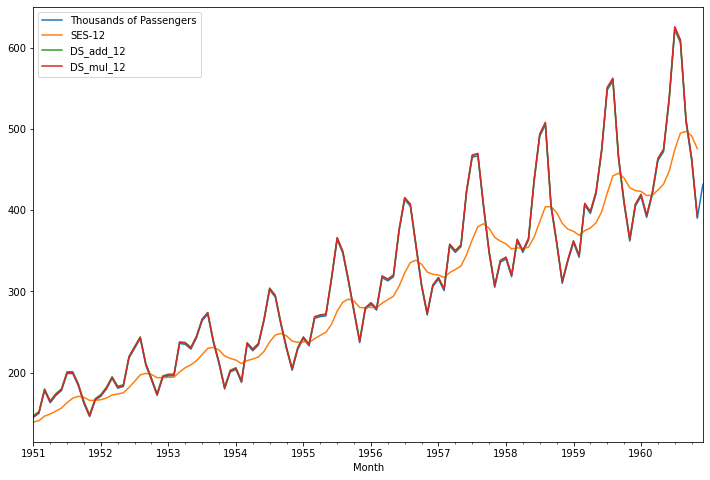

In [32]:
airline[['Thousands of Passengers','SES-12','DS_add_12','DS_mul_12']].iloc[24:].plot()

--- Triple Exponential Smoothing---

In [33]:
"""
besides trend parameter, we know have to adjust seasonal parameter here
Also, you need to add the seasonal_periods parameter
"""
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

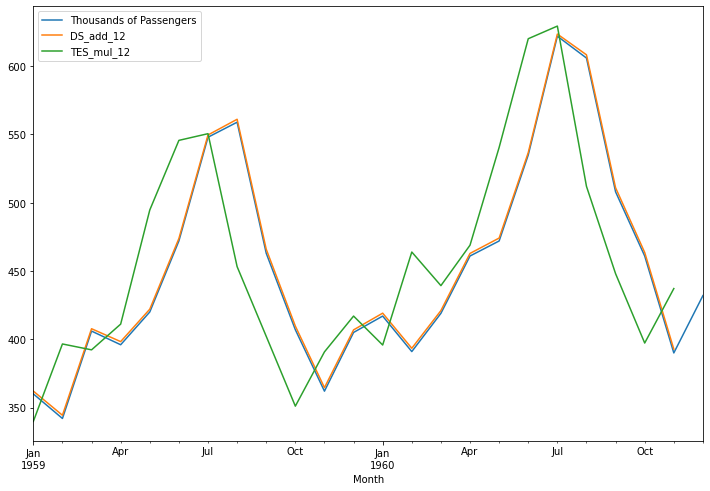

In [34]:
airline[['Thousands of Passengers','DS_add_12','TES_mul_12']].iloc[-24:].plot()

--- Forecasting with Holt-Winters---

In [80]:
"""
Procedure:
- Reset airline dataset
- Make sure date frequency set as MS
- Train/Test split 
    - Recommended: 80-20. However, make sure you have in train set at least the same time range
    you are willing to predict or more.
    - use .info() function to check the number of entries. Then calculate what is best for train/test split
- Use ExponentialSmoothing method to train the data
    - Use multiplicative trend, multiplicative seasonality and 12 seasonal periods
    - Fit the model and store the results in a separate variable called fitted_model
- Generate forecasts and compare with test data
    use the .forecast function, pass in the amount of time in months (freq=MS), and assign results to a variable!
- Plot train data, test data and forecasts to compare results
- Evaluation Metrics
    
"""
airline.drop(columns=airline.columns[1:],axis=1,inplace=True)

In [43]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [59]:
airline.info()
train_data = airline.iloc[:109]
test_data = airline.iloc[108:] 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [79]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                trend='mul', seasonal='mul',seasonal_periods=24).fit();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [76]:
test_predictions = fitted_model.forecast(36)

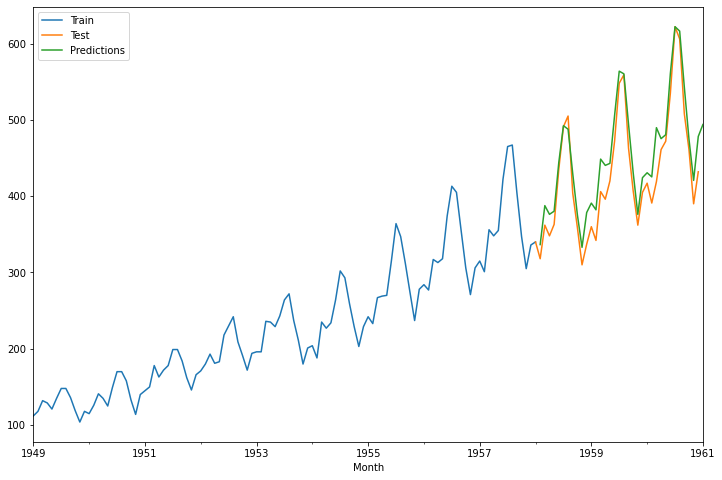

In [78]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predictions');

In [81]:
"""
Evaluation Metrics
    - Mean Absolute Error: The mean of the absolute value of errors. In other words, how far off is prediction from real in average
    - Mean Squared Error: Square difference between predictions and real values and errors will be weighted.
    - Root Mean Square Error: This one avoids better interpretability of MSE since MSE units are squared.
"""
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [88]:
print(f"""MAE: {mean_absolute_error(test_data,test_predictions)},
MSE: {mean_squared_error(test_data,test_predictions)},
RMSE: {np.sqrt(mean_squared_error(test_data,test_predictions))}""")

MAE: 49.44525513839446,
MSE: 3327.779220274152,
RMSE: 57.68690683572965


In [90]:
"Final Model: Train the model using ALL the data"
final_model = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [91]:
forecast_predictions = final_model.forecast(36)

<AxesSubplot:title={'center':'FUTURE'}, xlabel='Month'>

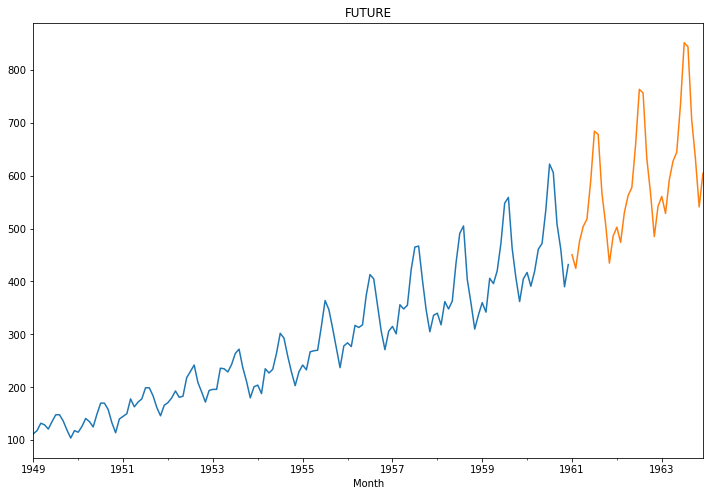

In [93]:
airline['Thousands of Passengers'].plot(title="FUTURE")
forecast_predictions.plot()

---Stationarity or Differencing---

In [95]:
"""
- Stationarity:
    Time series data does NOT exhibit trends or seasonality
    A stationary series has constant mean and variance over time
    A stationary data set will allow our model to predict the mean and variance will be the same in future periods
    The Augmented Dickey-Fuller test  is used to determine whether some data is stationary or not!
    If you determine your data is NOT stationary, you will then need to transform it to be stationary in order to
    evaluate it and determine what type of ARIMA terms you will use. the transformation could be done by differencing
    the data, at the cost of losing raw data.
- Differencing:
    - I think is a way to evaluate whether a variable is stationary or not? pending to confirm
    - Is like doing the following: df2['b'] - df2['b'].shift(1). We can do this with diff method from statsmodel library
"""

df2 = pd.read_csv('C:/Users/anton/Google Drive/Master in Data Science/Courses/8. Time Series with Python/UDEMY_TSA_FINAL/Data/samples.csv',index_col=0,parse_dates=True)

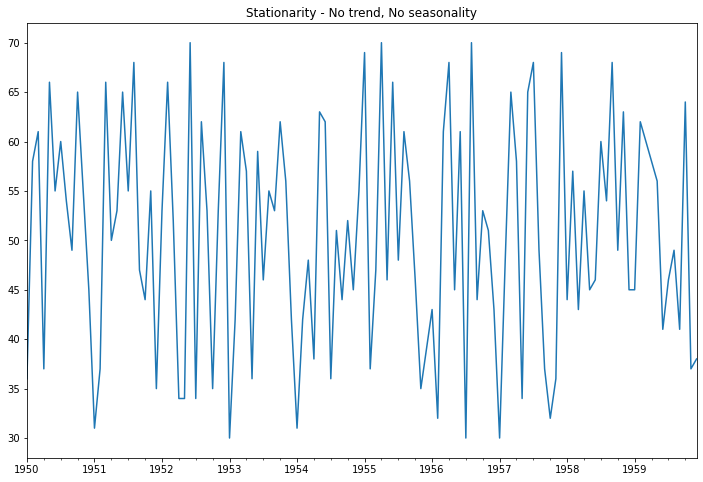

In [102]:
df2['a'].plot(title='Stationarity - No trend, No seasonality');

<AxesSubplot:>

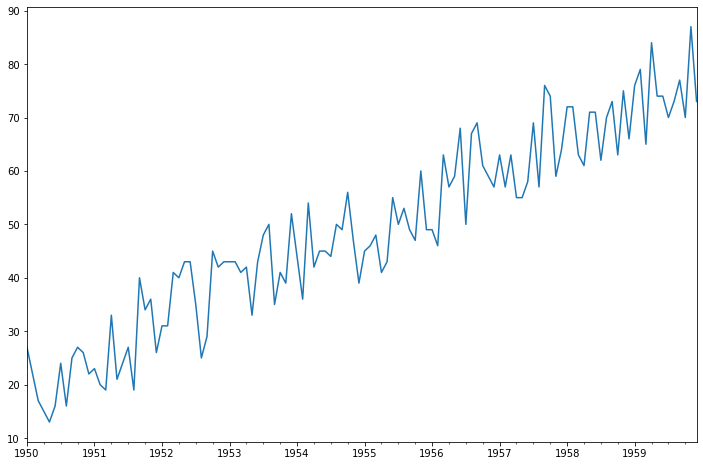

In [100]:
df2['b'].plot()

In [105]:
"""
Differencing tool
"""
from statsmodels.tsa.statespace.tools import diff

In [108]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [110]:
diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<AxesSubplot:>

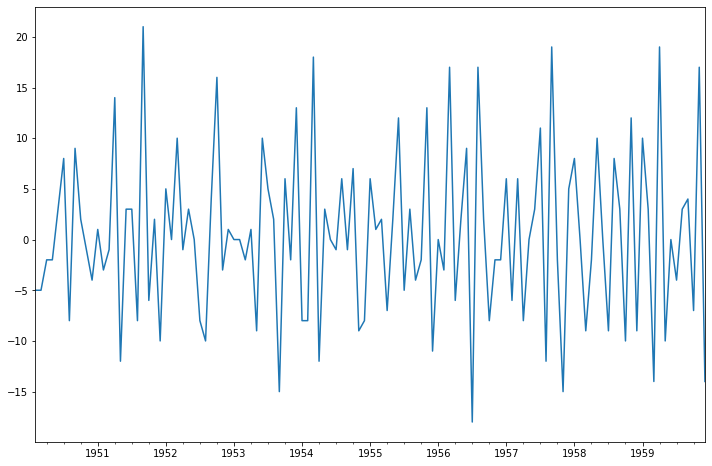

In [111]:
diff(df2['b'],k_diff=1).plot()